## Load packages:

In [0]:
#1 Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

    100% |████████████████████████████████| 993kB 1.6MB/s 

For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



In [0]:
#2. Get the file
#make sure you upload all your data files to your Google drive and change share->Advanced->change->anyone with the link can view
#downloaded = drive.CreateFile({'id':'1VBkYhKY1Z3DZRcsHvNIwA34wz-0jO7kL'}) # replace the id with id of file you want to access
#downloaded.GetContentFile('paris-listings.csv') 
downloaded1 = drive.CreateFile({'id':'1bKruzsQePxQVi2VfvKqviO6GSnlkhjtA'}) # replace the id with id of file you want to access
downloaded1.GetContentFile('paris-calendar.csv') 
downloaded2 = drive.CreateFile({'id':'1r5QOMPQETdjyKi2p7tATdGe2wLaXAsfw'}) # replace the id with id of file you want to access
downloaded2.GetContentFile('paris reviews.csv') 

In [0]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm

sns.set_style('darkgrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [0]:
## 

## Data Importing

In [0]:
calendar_data = pd.read_csv('paris-calendar.csv')
reviews= pd.read_csv('paris reviews.csv')

In [0]:
calendar_data.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,2577,2019-02-05,f,$125.00,$125.00,3.0,1125.0
1,2577,2019-02-06,f,$125.00,$125.00,3.0,1125.0
2,2577,2019-02-07,f,$125.00,$125.00,3.0,1125.0
3,2577,2019-02-08,f,$125.00,$125.00,3.0,1125.0
4,2577,2019-02-09,f,$125.00,$125.00,3.0,1125.0


In [0]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2577,366217274,2019-01-02,28047930,Kate,Beautiful apartment in a really handy location...
1,5396,4824,2009-06-30,19995,Sarah,Perfect location!! Nasrine was a delight and m...
2,5396,4968,2009-07-03,20117,Chris,This is a nice place in a great location in Pa...
3,5396,5240,2009-07-08,22190,Annelaure,"Nice studio, very clean, very quiet, in a grea..."
4,5396,9619,2009-09-10,11947,Jean,"Superb location, great studio. \r\nA slice of ..."


In [0]:
#lists_file['id'].nunique()

In [0]:
#lists_file['id'].count()

In [0]:
reviews.groupby('listing_id')['date'].nunique().sort_values(ascending=False).reset_index(name='count')

,listing_id,count
0,629248,749
1,846954,669
2,1249964,629
3,162163,564
4,2412144,538
5,240938,534
6,2488829,503
7,1525865,499
8,35065,480
9,315665,468


In [0]:
calendar_data.groupby('listing_id')['date'].nunique().sort_values(ascending=False).reset_index(name='count')

,listing_id,count
0,28142750,366
1,6533768,366
2,21673148,366
3,26581617,366
4,3516335,366
5,13543859,366
6,10201441,366
7,6519996,366
8,15502695,366
9,7173620,366


In [0]:
#for x in lists_file.columns:
#  print(x)

In [0]:
#lists_file.groupby('listing_url')['id'].nunique().sort_values(ascending=False).reset_index(name='count').head()

In [0]:
#lists_file['listing_url'].value_counts().head()

In [0]:
#lists_file.describe()

In [0]:
#lists_file.groupby('id')['scrape_id'].nunique().sort_values(ascending=False).reset_index(name='count')

In [0]:
#lists_file.host_id.value_counts().head()

In [0]:
#lists_file[lists_file['host_id']== 6053288].head(10)

## Data wrangling

In [0]:
split=pd.DataFrame()
split['year']=pd.to_datetime(calendar_data['date']).dt.year
split['month']=pd.to_datetime(calendar_data['date']).dt.month
split['dayofweek']=pd.to_datetime(calendar_data['date']).dt.dayofweek
new_calendar=calendar_data.join(split,on=None,how='left',sort=False)

In [0]:
#remove $ sign in price
new_calendar['price']=new_calendar['price'].str.replace('$','')

In [0]:
new_calendar['price']=pd.to_numeric(new_calendar['price'],errors='coerce')

In [0]:
buttom = new_calendar['price'].quantile(0.01)
top = new_calendar['price'].quantile(0.99)
new_calendar = new_calendar[(new_calendar["price"] < top) & (new_calendar["price"] > buttom)]
new_calendar['price'].quantile(0.01)

30.0

In [0]:
new_calendar['date'] =pd.to_datetime(calendar_data['date'])

In [0]:
pd.isna(new_calendar).sum()

listing_id         0
date               0
available          0
price              0
adjusted_price     0
minimum_nights    16
maximum_nights    16
year               0
month              0
dayofweek          0
dtype: int64

In [0]:
split=pd.DataFrame()
split['year']=pd.to_datetime(reviews['date']).dt.year
split['month']=pd.to_datetime(reviews['date']).dt.month
split['dayofweek']=pd.to_datetime(reviews['date']).dt.dayofweek
new_reviews=reviews.join(split,on=None,how='left',sort=False)
new_reviews['date'] =pd.to_datetime(reviews['date'])

In [0]:
new_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,year,month,dayofweek
0,2577,366217274,2019-01-02,28047930,Kate,Beautiful apartment in a really handy location...,2019,1,2
1,5396,4824,2009-06-30,19995,Sarah,Perfect location!! Nasrine was a delight and m...,2009,6,1
2,5396,4968,2009-07-03,20117,Chris,This is a nice place in a great location in Pa...,2009,7,4
3,5396,5240,2009-07-08,22190,Annelaure,"Nice studio, very clean, very quiet, in a grea...",2009,7,2
4,5396,9619,2009-09-10,11947,Jean,"Superb location, great studio. \r\nA slice of ...",2009,9,3


## Data exploration

### 1 Exploer seasonal pattern of listing prices: How does price changes in each month?

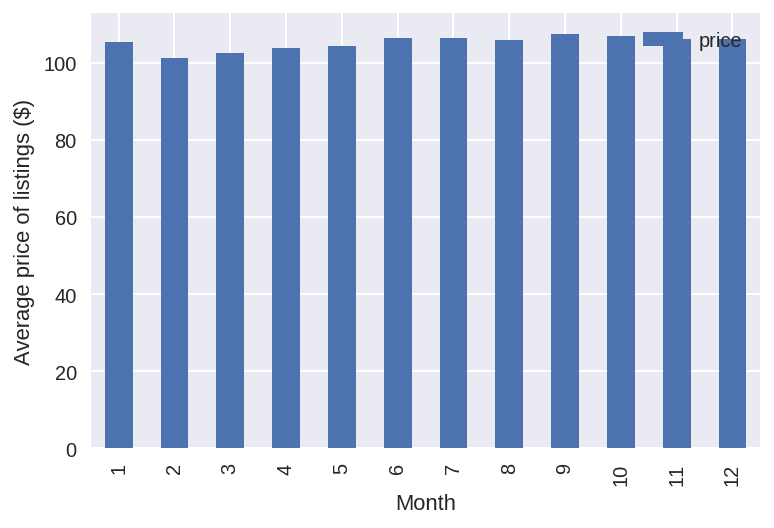

In [0]:
price_month_mean=new_calendar[['month','price']].groupby('month').mean()
plot1=price_month_mean.plot(kind='bar')
plot1.set_xlabel('Month')
plot1.set_ylabel('Average price of listings ($)')
plot1

In [0]:
price_month_mean

,price
month,
1,105.478785
2,101.272668
3,102.635525
4,103.700590
5,104.219022
6,106.278886
7,106.290482
8,105.942758
9,107.396047


Text(0.5, 1.0, 'Listing price by month')

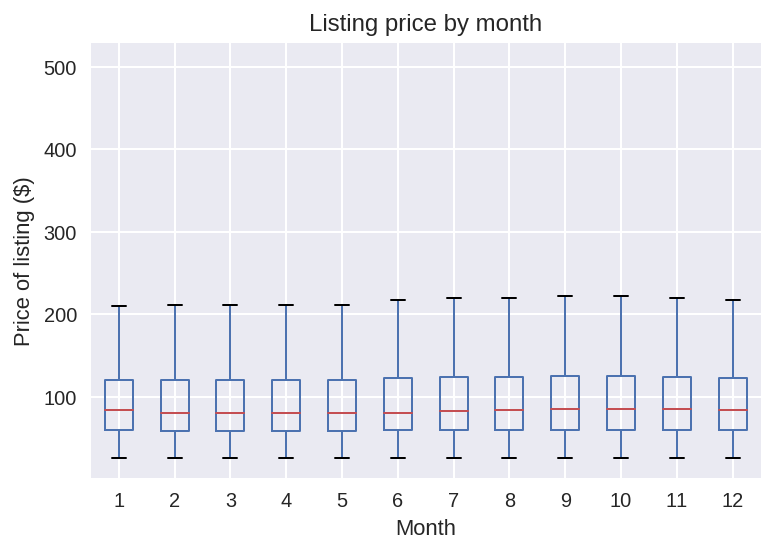

In [0]:

plot2=new_calendar[['month','price']].pivot(columns='month',values='price').boxplot()
plot2.set_xlabel('Month')
plot2.set_ylabel('Price of listing ($)')
plot2.set_title('Listing price by month')

From the plots, it is apprently that the Airbnb prices in September and October are significantly more expensive. According to report on US News, looks like average hotel prices in September and Octorber also are significantly more expensive than the other months. 

In [0]:
new_calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,year,month,dayofweek
0,2577,2019-02-05,f,125.0,$125.00,3.0,1125.0,2019,2,1
1,2577,2019-02-06,f,125.0,$125.00,3.0,1125.0,2019,2,2
2,2577,2019-02-07,f,125.0,$125.00,3.0,1125.0,2019,2,3
3,2577,2019-02-08,f,125.0,$125.00,3.0,1125.0,2019,2,4
4,2577,2019-02-09,f,125.0,$125.00,3.0,1125.0,2019,2,5


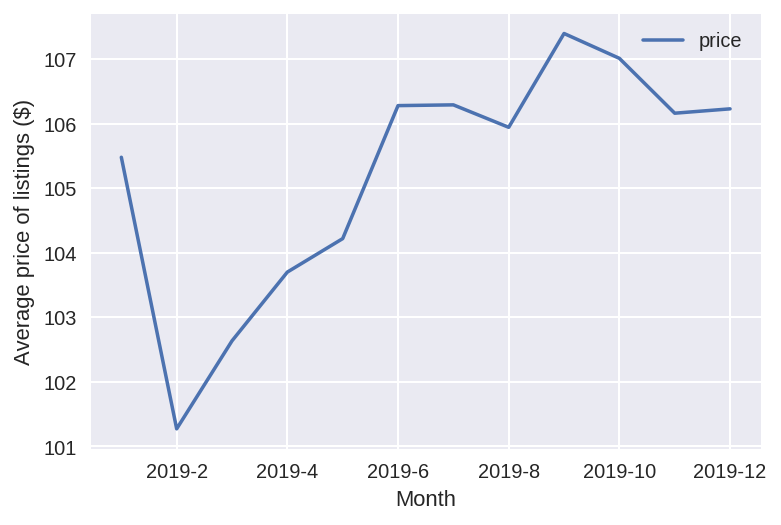

In [0]:

price_date_mean=price_date=new_calendar[['date','price']].groupby('date').mean()
plot3=price_month_mean.plot(kind='line')
plot3.set_xlabel('Month')

plot3.set_ylabel('Average price of listings ($)')
plot3.set_xticklabels(\
    ['2018-12','2019-2','2019-4','2019-6','2019-8', '2019-10','2019-12']);

plot3

### 2 Explorer price dependence on day of week

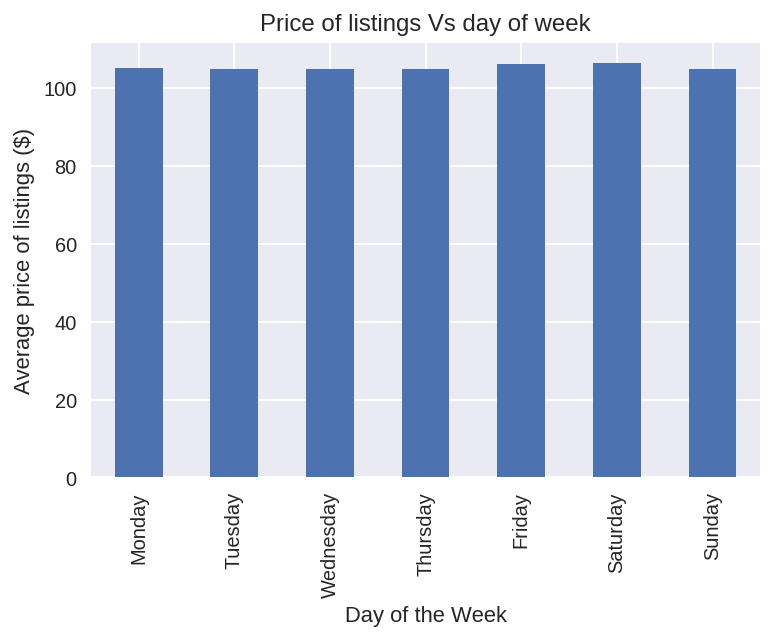

In [0]:
price_week_mean=new_calendar[['dayofweek','price']].groupby('dayofweek').mean()
plot3=price_week_mean.plot(kind='bar',legend=None)
plot3.set_xlabel('Day of the Week')
plot3.set_ylabel('Average price of listings ($)')
plot3.set_title('Price of listings Vs day of week')
plot3.set_xticklabels(\
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']);
plot3

In [0]:
price_week_mean

,price
dayofweek,
0,104.926227
1,104.893161
2,104.901571
3,104.885209
4,106.147427
5,106.253012
6,104.710557


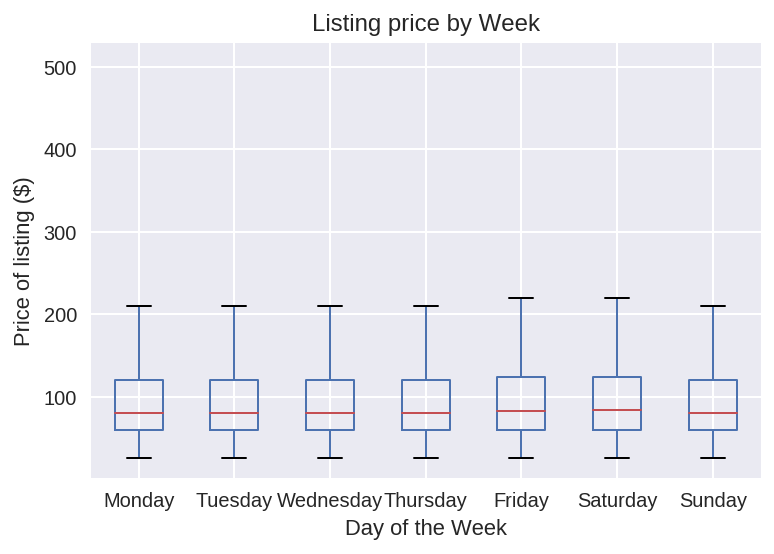

In [0]:
plot2=new_calendar[['dayofweek','price']].pivot(columns='dayofweek',values='price').boxplot()
plot2.set_xlabel('Day of the Week')
plot2.set_ylabel('Price of listing ($)')
plot2.set_title('Listing price by Week')
plot2.set_xticklabels(\
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']);

The listing prices on Friday and Saturday are slightly more expensive than the rest of the week.

### Using Reviews to view the growth of Airbnb customers

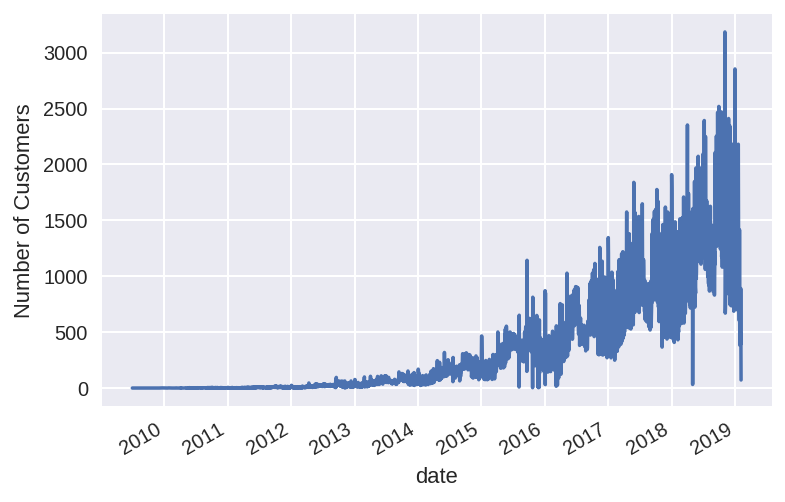

In [0]:

plot5=new_reviews.groupby('date')['id'].count().plot(kind='line')
plot5.set_xlabel('date')
plot5.set_ylabel('Number of Customers')


plot5

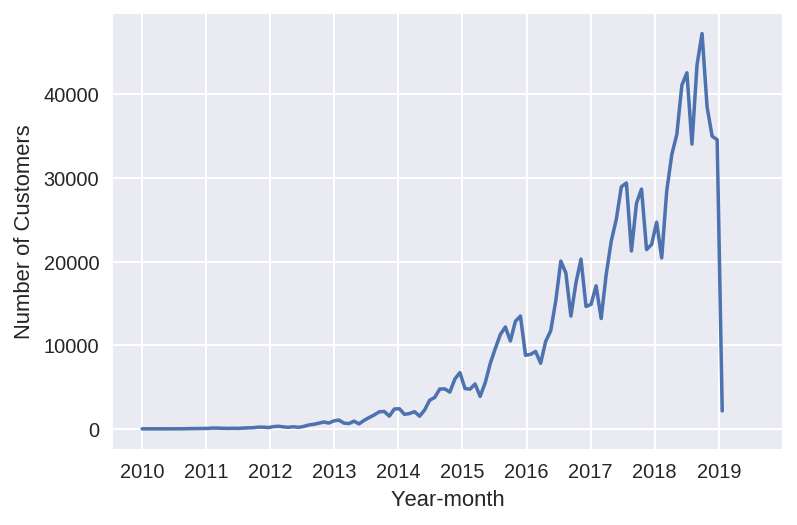

In [0]:

plot4=new_reviews.groupby(['year','month'])['id'].count().plot(kind='line')
plot4.set_xlabel('Year-month')
plot4.set_ylabel('Number of Customers')
plot4.set(xticks=np.arange(0,130,12.7),xticklabels=[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,2018, 2019])
plot4

In [0]:
import plotly.plotly as py
import plotly.graph_objs as go

In [0]:
import plotly
# Authenticate with your account
plotly.tools.set_credentials_file(username='ethanfu03',                                              
                                  api_key='9PHS4vBWBXQVGafcGjYG')

In [0]:
interact_plot = new_reviews.groupby('date')['id'].count()
energy_data  = go.Scatter(x=interact_plot.index,
                         y=interact_plot.values)
layout = go.Layout(title='Number of CUstomers', xaxis=dict(title='Date'),
                   yaxis=dict(title='(Number of Reviews)'))

In [0]:
fig = go.Figure(data=[energy_data], layout=layout)
py.iplot(fig, sharing='public')

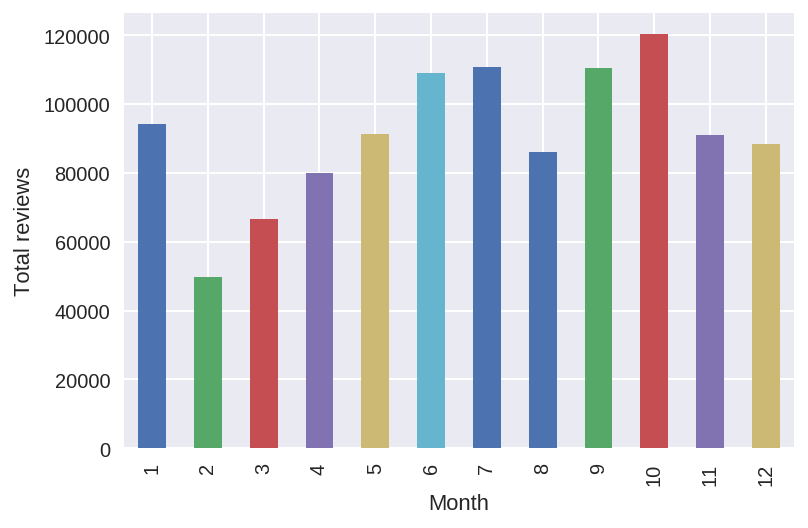

In [0]:
review_month=new_reviews.groupby('month')['id'].count()
plot5=review_month.plot(kind='bar')
plot5.set_xlabel('Month')
plot5.set_ylabel('Total reviews')
plot5

In [0]:
review_month= new_reviews.groupby(['year','month']).count()
review_month.reset_index(inplace = True)
reviews_month_mean= review_month[['month','id']].groupby('month').mean()

In [0]:
reviews_month_mean

,id
month,
1,9430.800000
2,4983.300000
3,7391.000000
4,8900.777778
5,10142.000000
6,10904.400000
7,11071.500000
8,9567.666667
9,11038.800000


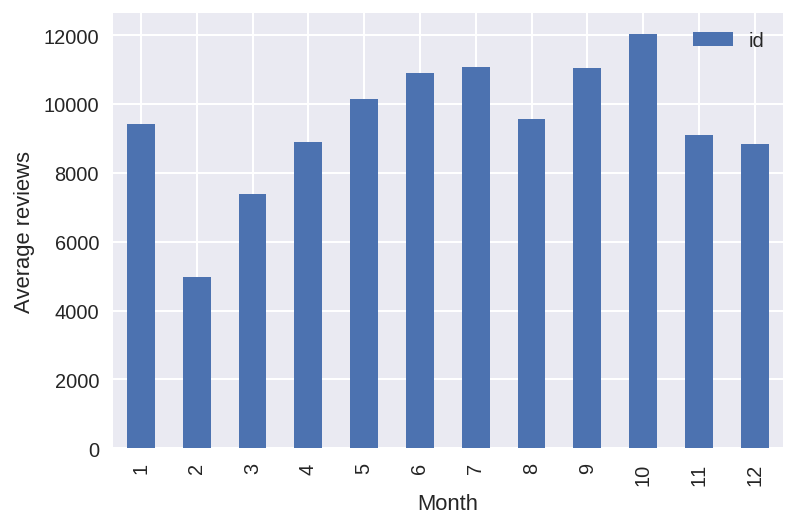

In [0]:
plot5=reviews_month_mean.plot(kind='bar')
plot5.set_xlabel('Month')
plot5.set_ylabel('Average reviews')
plot5

In [0]:
reviews_week_count=new_reviews[['date','dayofweek','id']].groupby(['date','dayofweek']).count()
reviews_week_count.reset_index(inplace = True)
reviews_week_mean= reviews_week_count[['dayofweek','id']].groupby('dayofweek').mean()


In [0]:
reviews_week_mean

,id
dayofweek,
0,386.770065
1,304.909292
2,290.821826
3,295.562914
4,334.701124
5,306.626398
6,504.681223


In [0]:
reviews_week_count['dayofweek'].value_counts()

0    461
6    458
3    453
1    452
2    449
5    447
4    445
Name: dayofweek, dtype: int64

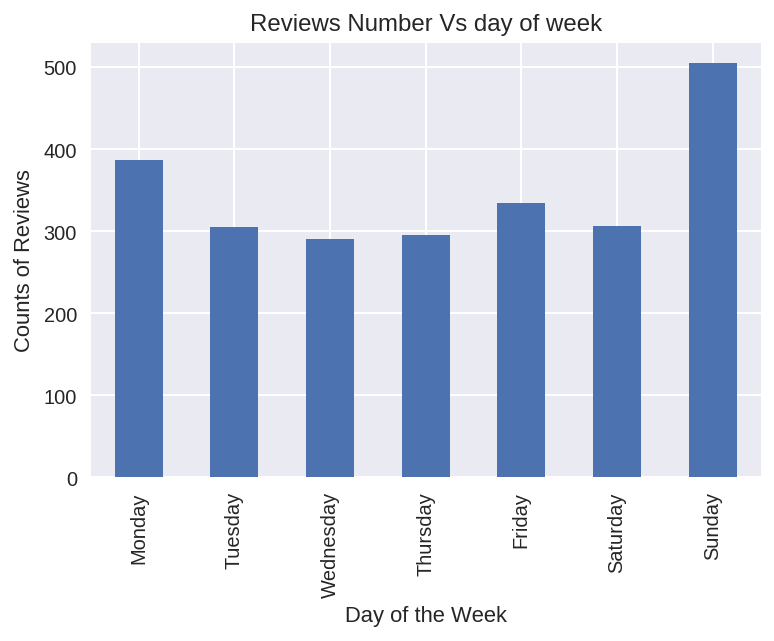

In [0]:
plot6=reviews_week_mean.plot(kind='bar',legend=None)
plot6.set_xlabel('Day of the Week')
plot6.set_ylabel('Counts of Reviews')
plot6.set_title('Reviews Number Vs day of week')
plot6.set_xticklabels(\
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']);
plot6

# Time Serise Pridection

## Y data time

Pridecting the price based on new_calendar

In [0]:
new_calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,year,month,dayofweek
0,2577,2019-02-05,f,125.0,$125.00,3.0,1125.0,2019,2,1
1,2577,2019-02-06,f,125.0,$125.00,3.0,1125.0,2019,2,2
2,2577,2019-02-07,f,125.0,$125.00,3.0,1125.0,2019,2,3
3,2577,2019-02-08,f,125.0,$125.00,3.0,1125.0,2019,2,4
4,2577,2019-02-09,f,125.0,$125.00,3.0,1125.0,2019,2,5


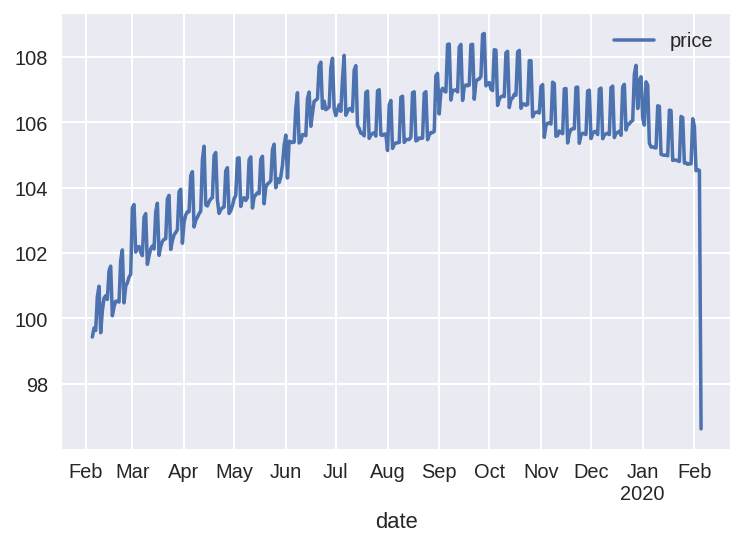

In [0]:
y = price_date.groupby('date').mean()
y.plot()

In [0]:
data  = go.Scatter(x=y.index,
                         y=y.values)
layout = go.Layout(title='Price vs Date', xaxis=dict(title='Date'),
                   yaxis=dict(title='(Price)'))


In [0]:
fig = go.Figure(data=[data], layout=layout)
py.iplot(fig, sharing='public')

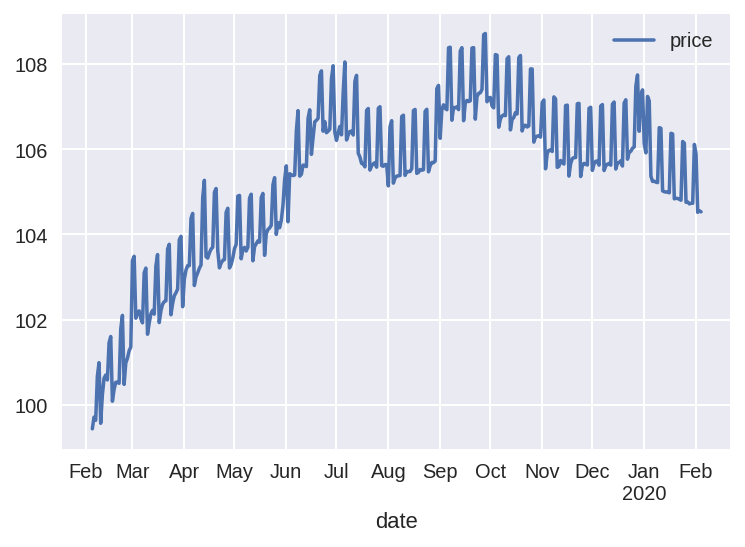

In [0]:
#droping 2020-02-05, due to it is too low

y=y[:-1]
y.plot()

In [0]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
				)

res = mod.fit()

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning:


The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.



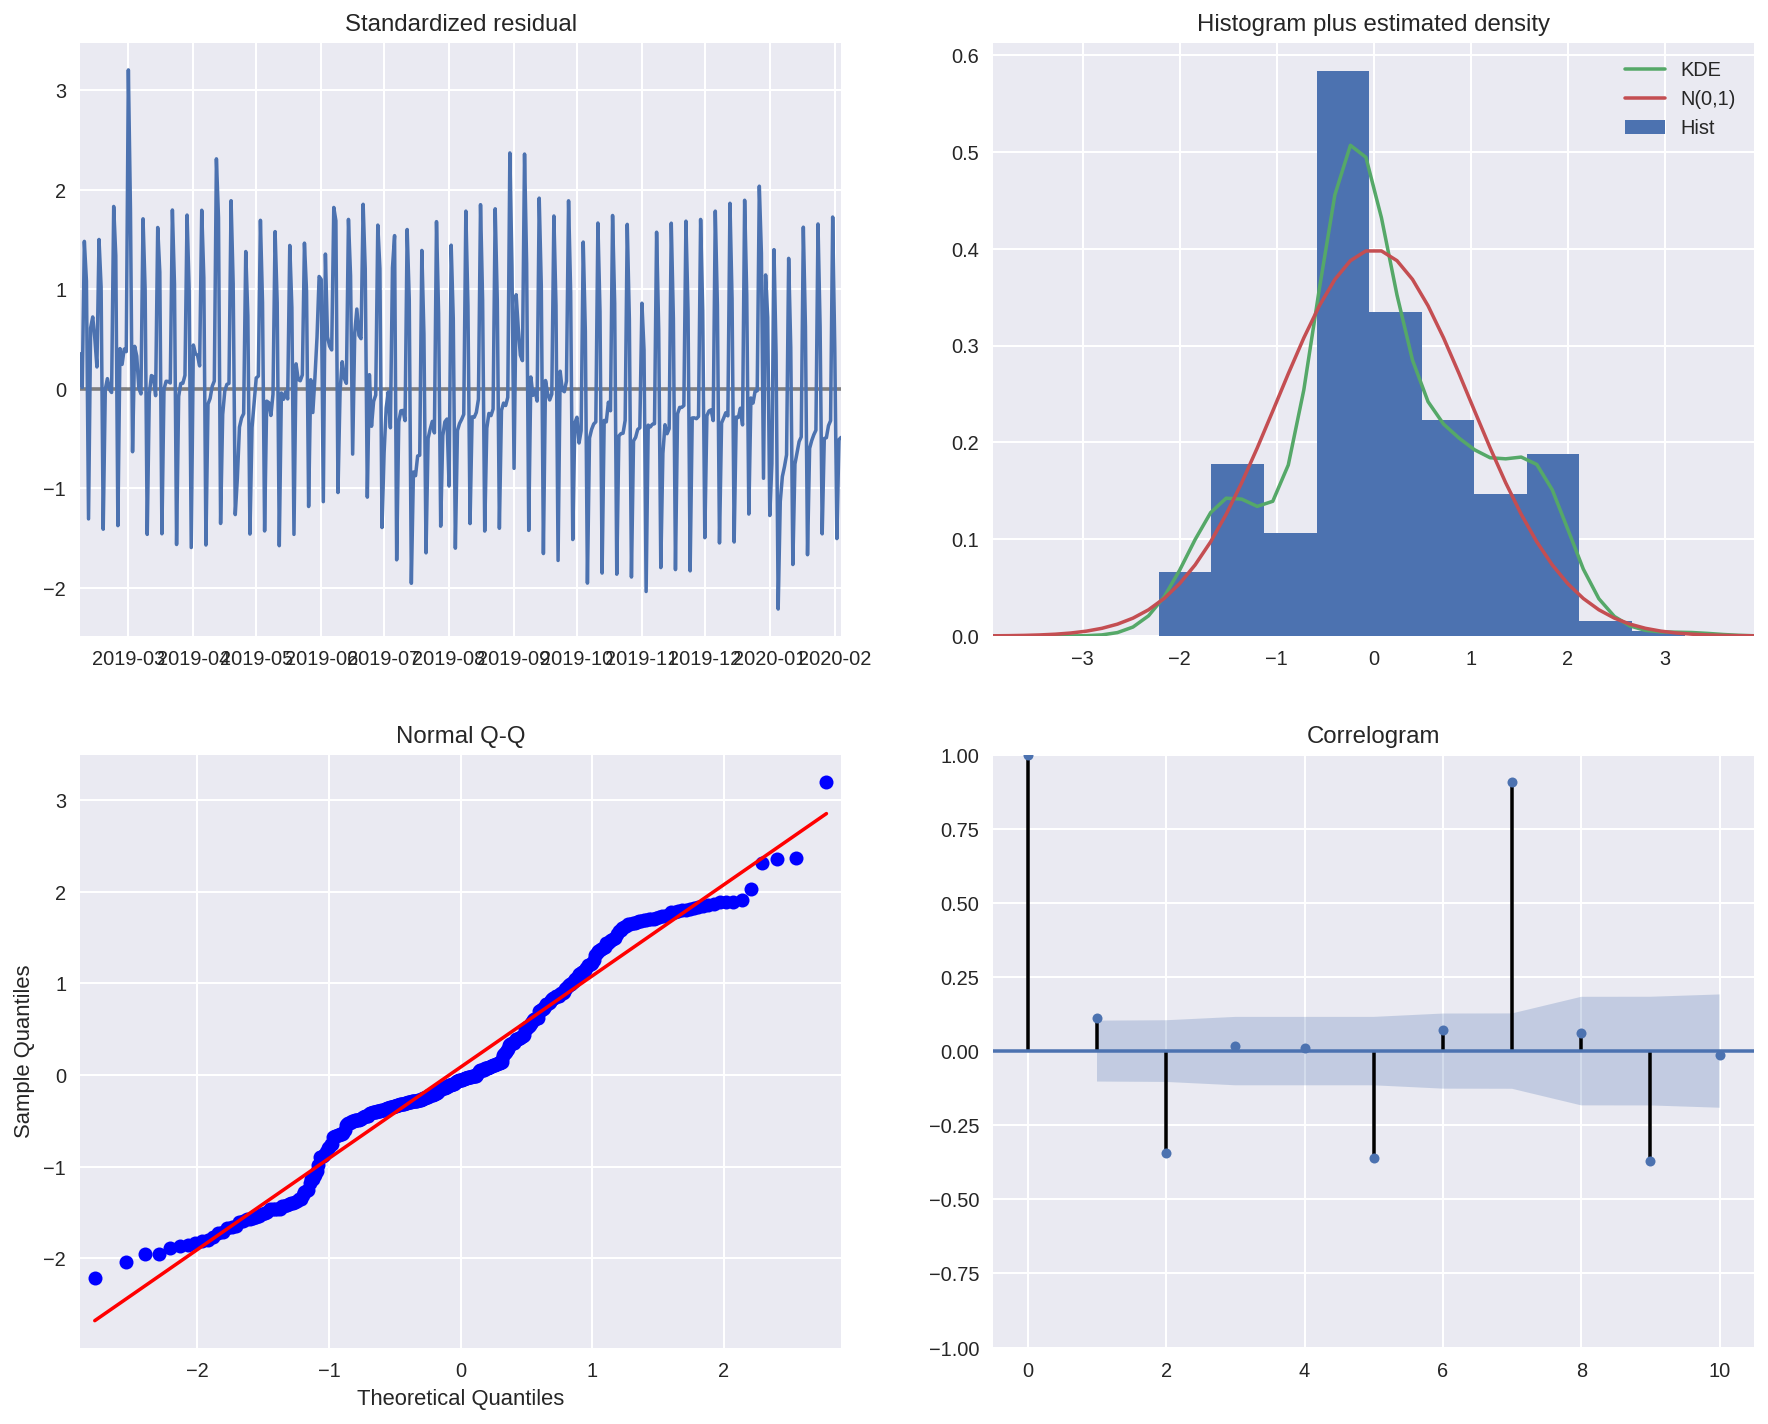

In [0]:
res.plot_diagnostics(figsize=(15, 12))
plt.show()

In [0]:
pred = res.get_prediction(start=pd.to_datetime('2020-01-01'), dynamic=False)
pred_ci = pred.conf_int()
pred_ci.head()

,lower price,upper price
2020-01-01,105.669049,108.382116
2020-01-02,105.082351,107.795419
2020-01-03,104.920414,107.633482
2020-01-04,105.546174,108.259241
2020-01-05,105.546707,108.259774


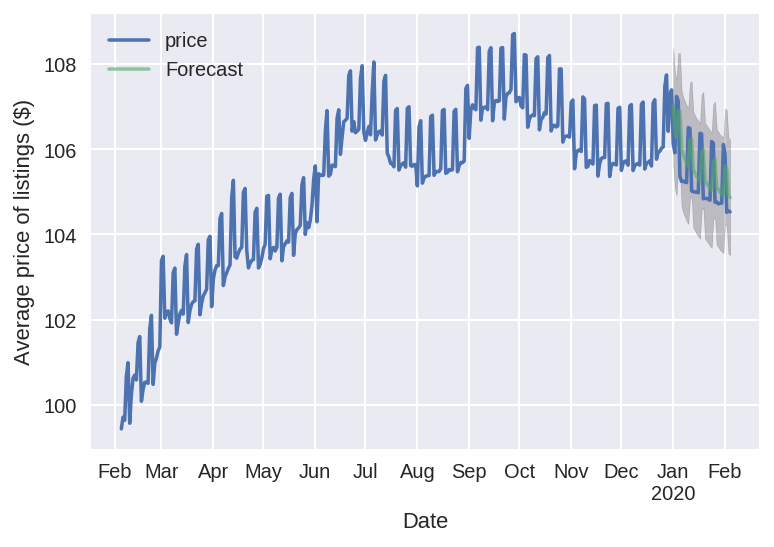

In [0]:
ax = y.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=.6)

ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Average price of listings ($)')
plt.legend()

plt.show()

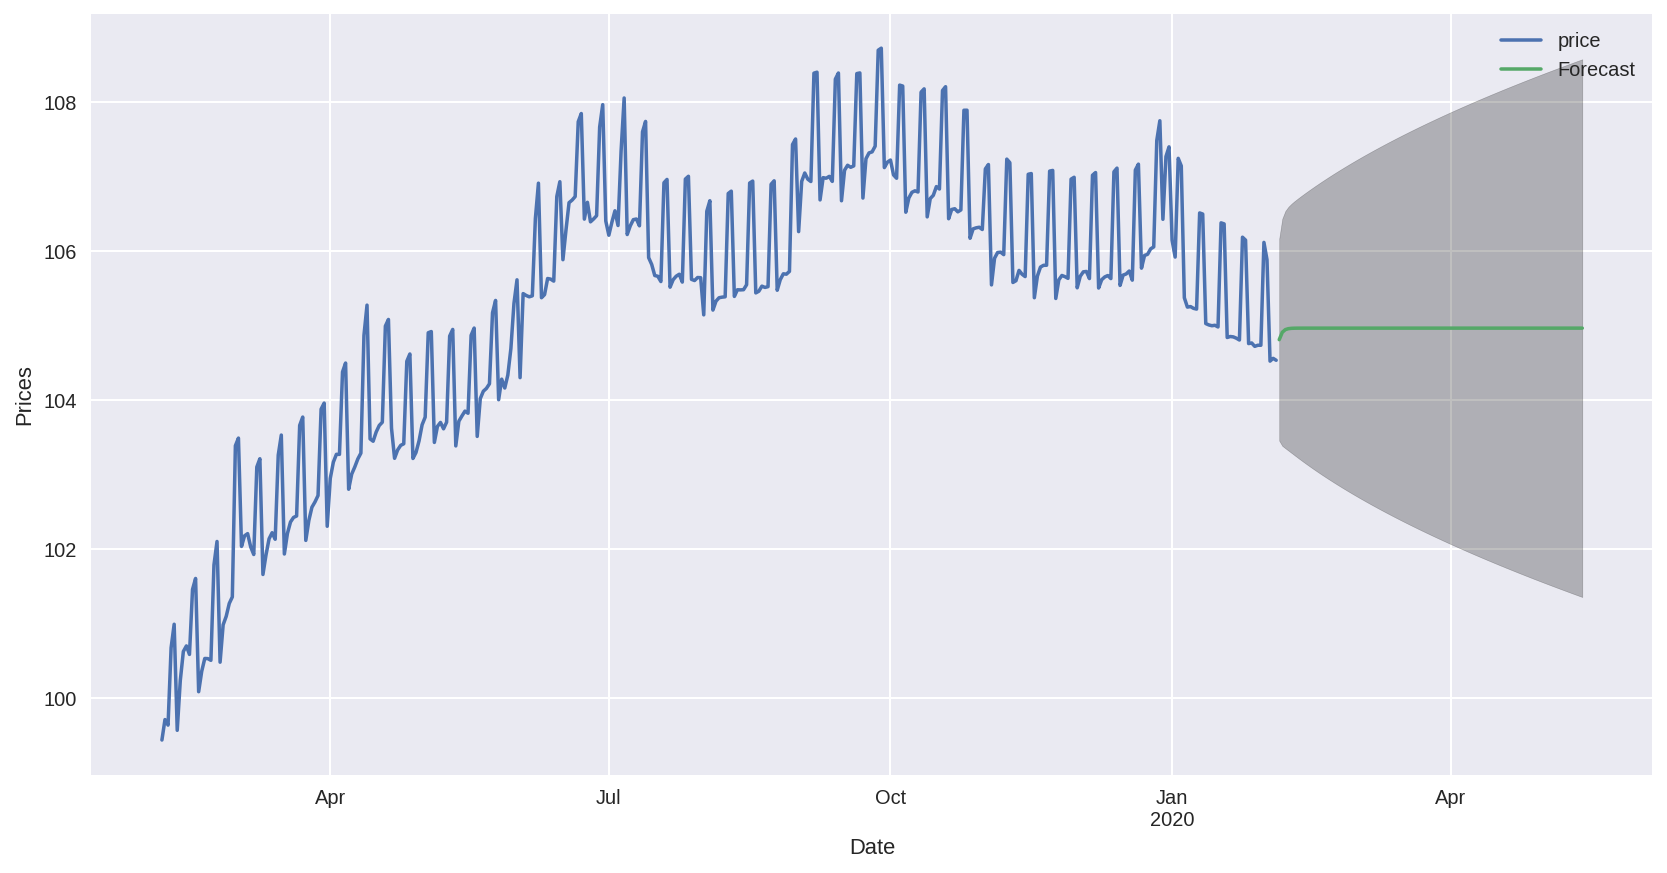

In [0]:
pred_uc = res.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Prices')
plt.legend()
plt.show()

In [0]:
from fbprophet import Prophet


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Text(0.5, 1.0, 'Number of Reviews')

<Figure size 1296x432 with 0 Axes>

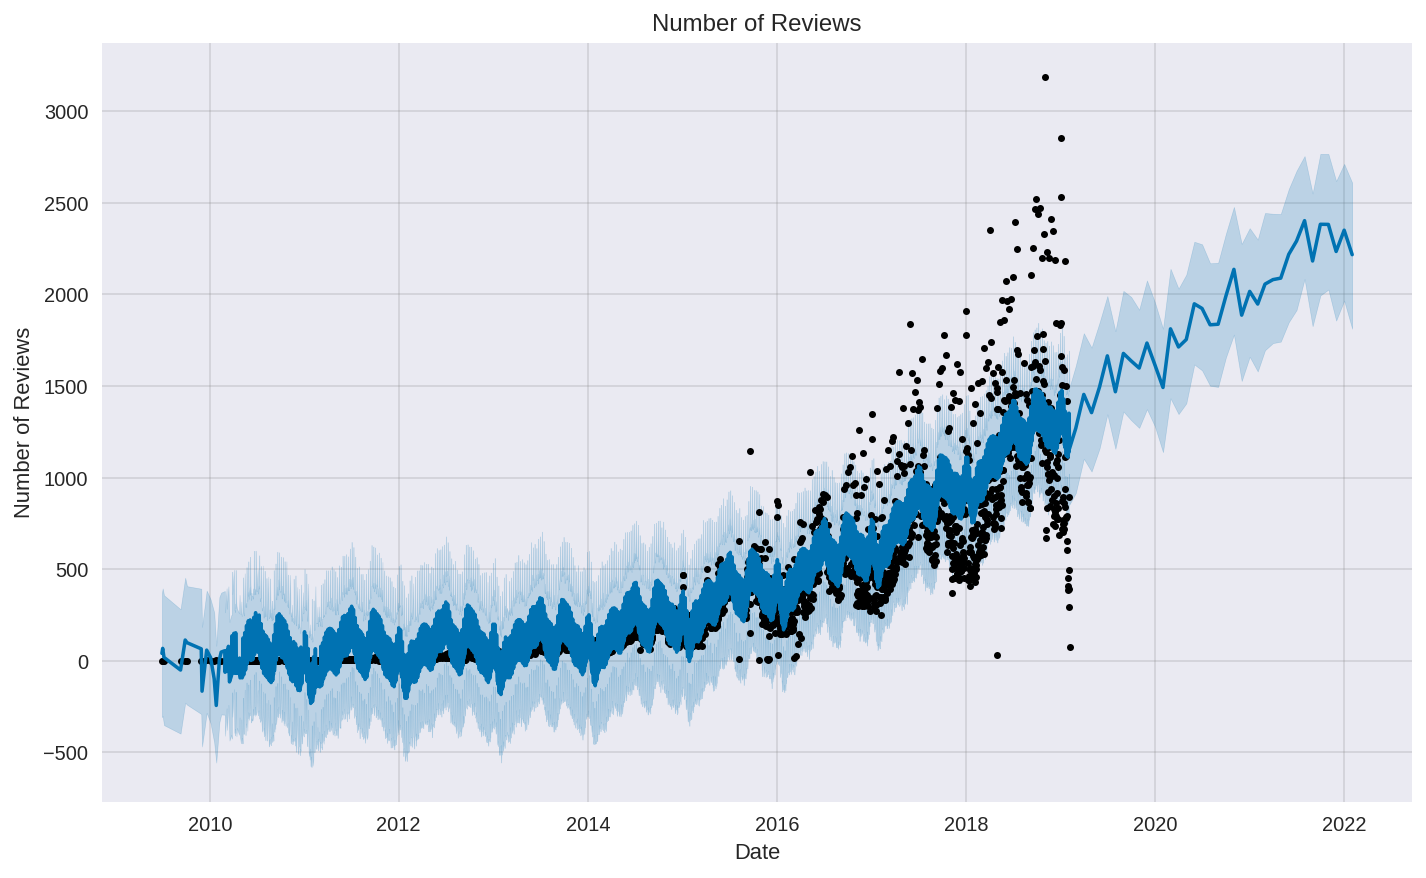

In [0]:
reviews_count =new_reviews.groupby('date').count()
reviews_count.reset_index(inplace = True)
reviews_count= reviews_count[['date','id']]
reviews_count= reviews_count.rename(columns={'date': 'ds', 'id': 'y'})
reviews_model = Prophet(interval_width=0.95)
reviews_model.fit(reviews_count)
reviews_forecast = reviews_model.make_future_dataframe(periods=36, freq='MS')
reviews_forecast = reviews_model.predict(reviews_forecast)
plt.figure(figsize=(18, 6))
reviews_model.plot(reviews_forecast, xlabel = 'Date', ylabel = 'Number of Reviews')
plt.title('Number of Reviews')

In [0]:
reviews_forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2009-06-30,-49.296830,-308.529197,370.199524,-49.296830,-49.296830,89.415267,89.415267,89.415267,-42.866532,-42.866532,-42.866532,132.281799,132.281799,132.281799,0.0,0.0,0.0,40.118438
1,2009-07-03,-49.099010,-301.731118,394.707248,-49.099010,-49.099010,116.543605,116.543605,116.543605,-18.011738,-18.011738,-18.011738,134.555343,134.555343,134.555343,0.0,0.0,0.0,67.444595
2,2009-07-08,-48.769311,-351.575010,357.435188,-48.769311,-48.769311,66.806536,66.806536,66.806536,-56.736486,-56.736486,-56.736486,123.543022,123.543022,123.543022,0.0,0.0,0.0,18.037225
3,2009-09-10,-44.549162,-397.901483,280.843544,-44.549162,-44.549162,-6.466253,-6.466253,-6.466253,-49.071967,-49.071967,-49.071967,42.605713,42.605713,42.605713,0.0,0.0,0.0,-51.015416
4,2009-09-28,-43.362245,-229.213394,453.111170,-43.362245,-43.362245,156.232045,156.232045,156.232045,46.994513,46.994513,46.994513,109.237533,109.237533,109.237533,0.0,0.0,0.0,112.869800
5,2009-10-05,-42.900667,-240.096189,406.896948,-42.900667,-42.900667,141.384593,141.384593,141.384593,46.994513,46.994513,46.994513,94.390080,94.390080,94.390080,0.0,0.0,0.0,98.483926
6,2009-11-29,-39.273976,-290.929647,393.038477,-39.273976,-39.273976,103.994723,103.994723,103.994723,163.632187,163.632187,163.632187,-59.637465,-59.637465,-59.637465,0.0,0.0,0.0,64.720747
7,2009-12-02,-39.076157,-468.577801,184.543838,-39.076157,-39.076157,-127.123485,-127.123485,-127.123485,-56.736486,-56.736486,-56.736486,-70.386999,-70.386999,-70.386999,0.0,0.0,0.0,-166.199642
8,2009-12-20,-37.889240,-284.273702,382.379171,-37.889240,-37.889240,95.746387,95.746387,95.746387,163.632187,163.632187,163.632187,-67.885801,-67.885801,-67.885801,0.0,0.0,0.0,57.857147
9,2010-01-04,-36.900142,-341.625624,335.466988,-36.900142,-36.900142,54.141900,54.141900,54.141900,46.994513,46.994513,46.994513,7.147387,7.147387,7.147387,0.0,0.0,0.0,17.241757


## Conclusion


If you are traveling on budget and still interested in visiting Boston, my advice is try to visit Boston on weekdays and avoild both September and Octorber

3个listing 里的 host    找到08年之后的新host

time serise pridection




Final report: finding an insight   1.肉眼 2. 分析的来的 3.吹
